# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.regularizers import l2
from keras import layers

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
#Load data into dataframe
dataset=pd.read_csv('drive/My Drive/Colab Notebooks/ionosphere_data.csv')

In [ ]:
# Look at data and datatypes
display(dataset.head())
display(dataset.tail())
display(dataset.describe())

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,0.78735,0.06678,0.80668,-0.00351,0.79262,-0.01054,0.85764,-0.04569,0.87170,-0.03515,0.81722,-0.09490,0.71002,0.04394,0.86467,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# check column 'feature2'
display(dataset['feature2'])

0      0
1      0
2      0
3      0
4      0
      ..
346    0
347    0
348    0
349    0
350    0
Name: feature2, Length: 351, dtype: int64

In [ ]:
# Drop 'feature2' as all values are 0
dataset.drop(columns=['feature2'],inplace=True)
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature3   351 non-null    float64
 2   feature4   351 non-null    float64
 3   feature5   351 non-null    float64
 4   feature6   351 non-null    float64
 5   feature7   351 non-null    float64
 6   feature8   351 non-null    float64
 7   feature9   351 non-null    float64
 8   feature10  351 non-null    float64
 9   feature11  351 non-null    float64
 10  feature12  351 non-null    float64
 11  feature13  351 non-null    float64
 12  feature14  351 non-null    float64
 13  feature15  351 non-null    float64
 14  feature16  351 non-null    float64
 15  feature17  351 non-null    float64
 16  feature18  351 non-null    float64
 17  feature19  351 non-null    float64
 18  feature20  351 non-null    float64
 19  feature21  351 non-null    float64
 20  feature22 

None

In [ ]:
# Check missing values in data
display(dataset.isnull())
display(dataset.isnull().sum())

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
347,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
348,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
# Shuffle data rows
dataset=dataset.sample(frac=1,random_state=42)

In [ ]:
# Encode labels
labelencoder=LabelEncoder()
dataset['label']=labelencoder.fit_transform(dataset['label'])
display(dataset.describe())

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# FIRST APPROACH: WITH IMBALANCED DATA

In [ ]:
# Split dataset into X(inputs) and Y(output)
Y=dataset['label']
X=dataset.drop(columns=['label'])

In [ ]:
# Split data into training set(60%) and testing set(40%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.40,random_state=42)

In [ ]:
# Normalize the training and test data
mean=x_train.mean(axis=0)
x_train-=mean

std=x_train.std(axis=0)
x_train/=std

x_test-=mean
x_test/=std


In [ ]:
# Convert data to float type
y_train=y_train.astype('float64')
y_test=y_test.astype('float64')
# add xside

In [ ]:
# Shape of data sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(210, 33)
(210,)
(141, 33)
(141,)


In [ ]:
# Define model
model=Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer = l2(0.001),  input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer = l2(0.001)))
model.add(layers.Dense(4, activation='relu', kernel_regularizer = l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train,epochs=60, batch_size=8)


Epoch 1/60
27/27 [==============================] - 1s 1ms/step - loss: 0.8116 - accuracy: 0.3948
Epoch 2/60
27/27 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.6181
Epoch 3/60
27/27 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7066
Epoch 4/60
27/27 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.8389
Epoch 5/60
27/27 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.8312
Epoch 6/60
27/27 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.8678
Epoch 7/60
27/27 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.8440
Epoch 8/60
27/27 [==============================] - 0s 3ms/step - loss: 0.5377 - accuracy: 0.8938
Epoch 9/60
27/27 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.9474
Epoch 10/60
27/27 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.9136
Epoch 11/60
27/27 [

In [ ]:
# Test model
test_loss,test_accuracy=model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.9362


In [ ]:
# Predictions
y_pred=model.predict(x_test)
y_pred=y_pred>0.5


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44  4]
 [ 5 88]]


In [ ]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Precision = TruePositives / (TruePositives + FalsePositives)
# Confusion Matrix
# [[44  4]
#  [ 5 88]]
Recall=44/(44+4)
Precision=44/(44+5)
print("Recall is: ",Recall)
print("Precision is: ",Precision)

Recall is:  0.9166666666666666
Precision is:  0.8979591836734694


# SECOND APPROACH: DATA IS BALANCED USING OVERSAMPLING

In [ ]:
# Identifying Label 1 and Label 0 counts
df_label_1_count,df_label_0_count=dataset['label'].value_counts()
print("Label 1:",df_label_1_count, "Label 0:",df_label_0_count)


Label 1: 225 Label 0: 126
1    225
0    126
Name: label, dtype: int64


In [ ]:
# Separating Label 1 and Label 0 datasets
df_label_0=dataset[dataset['label']==0]
df_label_1=dataset[dataset['label']==1]


In [ ]:
print("df_label_0 size:", df_label_0.shape)
print("df_label_1 size:", df_label_1.shape)

df_label_0 size: (126, 34)
df_label_1 size: (225, 34)


In [ ]:
# OverSampling Label 0 data to make the dataset balanced
df_label_0_over=df_label_0.sample(df_label_1_count,replace=True)
df_over=pd.concat([df_label_0_over,df_label_1],axis=0)

df_over_1_count,df_over_0_count=df_over['label'].value_counts()
print("Label 1:",df_over_1_count, "Label 0:",df_over_0_count)
print("df_over_0 size:", df_over.shape)


Label 1: 225 Label 0: 225
df_over_0 size: (450, 34)


In [ ]:
# Shuffling the new dataset
df=df_over.sample(frac=1,random_state=42)

In [ ]:
# Separating Input and Output Columns
Y=df['label']
X=df.drop(columns=['label'])


In [ ]:
# Splitting data into training (60%) and testing(40%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.40,random_state=42)

In [ ]:
# Normalizing test and train data
mean=x_train.mean(axis=0)
x_train-=mean

std=x_train.std(axis=0)
x_train/=std

x_test-=mean
x_test/=std


In [ ]:
# Changing datatype to float
x_train=x_train.astype('float64')
x_test=x_test.astype('float64')

y_train=y_train.astype('float64')
y_test=y_test.astype('float64')



In [ ]:
# Final shapes of train and test data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(270, 33)
(270,)
(180, 33)
(180,)


In [ ]:
# Now the train and test datasets have balanced 1 and 0 data
print(y_train.value_counts())
print(y_test.value_counts())


1.0    138
0.0    132
Name: label, dtype: int64
0.0    93
1.0    87
Name: label, dtype: int64


In [ ]:
# Model
def build_model():
  model=Sequential()
  model.add(layers.Dense(16, activation='relu',kernel_regularizer=l2(0.01), input_shape=(x_train.shape[1],)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(8, activation='relu', kernel_regularizer = l2(0.001)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4, activation='relu', kernel_regularizer = l2(0.001)))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
# USING K-FOLD 
# Saving the Validation Logs at each fold
num_epochs = 100


In [ ]:
all_train_acc_histories=[]
all_val_acc_histories = []

all_train_loss_histories=[]
all_val_loss_histories=[]


In [ ]:
for i in range(k):
  print('processing fold #', i)
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([x_train[:i * num_val_samples],x_train[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples],y_train[(i + 1) * num_val_samples:]],axis=0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=8, verbose=0)

  train_acc_history = history.history['accuracy']
  val_acc_history = history.history['val_accuracy']
  
  train_loss_history=history.history['loss']
  val_loss_history=history.history['val_loss']
  
  all_train_acc_histories.append(train_acc_history) 
  all_val_acc_histories.append(val_acc_history)  

  all_train_loss_histories.append(train_loss_history)
  all_val_loss_histories.append(val_loss_history)
  

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [ ]:
# Average of Accuracy and loss at each epoch

average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
average_train_acc_history = [np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]

average_val_loss_histories = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_train_loss_histories = [np.mean([x[i] for x in all_train_loss_histories]) for i in range(num_epochs)]


In [ ]:
# 
print("VAL:",np.max(average_val_acc_history))
print("TRAIN:",np.max(average_train_acc_history))

VAL: 0.9592592597007752
TRAIN: 0.9749999880790711


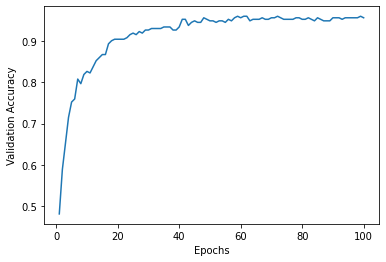

In [ ]:
# Average validation graph
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_val_acc_history) + 1), average_val_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()


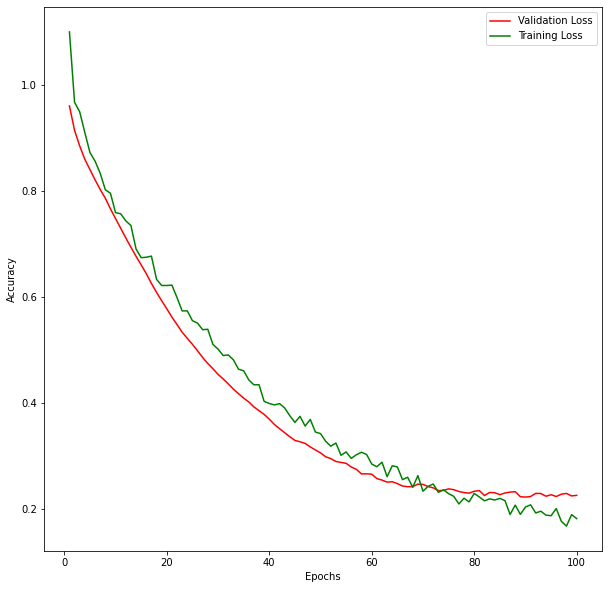

In [ ]:
# Comparison of Average Training and Validation Loss
plt.figure(figsize=(10,10))
plt.plot(range(1, len(average_val_loss_histories) + 1),average_val_loss_histories,'r',label="Validation Loss")
plt.plot(range(1, len(average_train_loss_histories) + 1),average_train_loss_histories,'g',label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


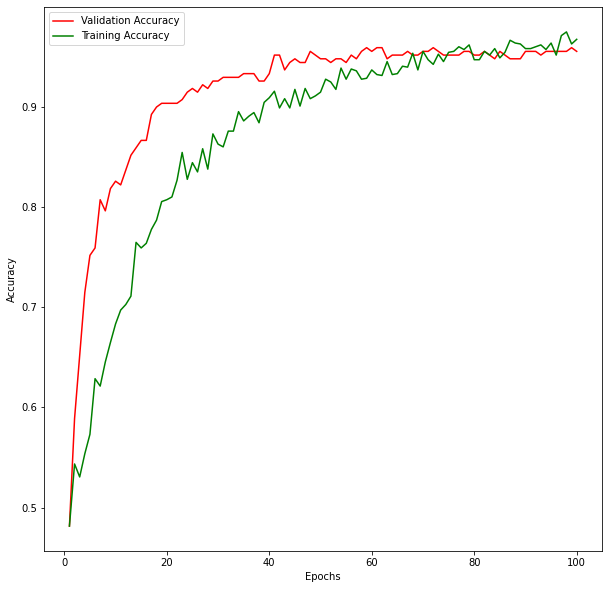

In [ ]:
# Comparison of Average Training and Validation Accuracy 
plt.figure(figsize=(10,10))
plt.plot(range(1, len(average_val_acc_history) + 1),average_val_acc_history,'r',label="Validation Accuracy")
plt.plot(range(1, len(average_train_acc_history) + 1),average_train_acc_history,'g',label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluating the model
model=build_model()
model.fit(x_train,y_train,epochs=100,batch_size=8,verbose=0)
test_loss,test_accuracy=model.evaluate(x_test,y_test)


6/6 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9722


In [ ]:
# Testing accuracy is 97.22%

In [ ]:
# Predictions
y_pred=model.predict(x_test)
y_pred=y_pred > 0.5

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[91  2]
 [ 3 84]]


In [ ]:
# Recall = TruePositives / (TruePositives + FalseNegatives)

# Precision = TruePositives / (TruePositives + FalsePositives)

# [[91  2]
#  [ 3 84]]
Recall=91/(91+2)
Precision=91/(91+3)
print("Recall is: ", Recall)
print("Precision is: ", Precision)

Recall is:  0.978494623655914
Precision is:  0.9680851063829787


### RESULT: PRECISION AND RECALL ARE BETTER WITH BALANCED DATA